**Data**

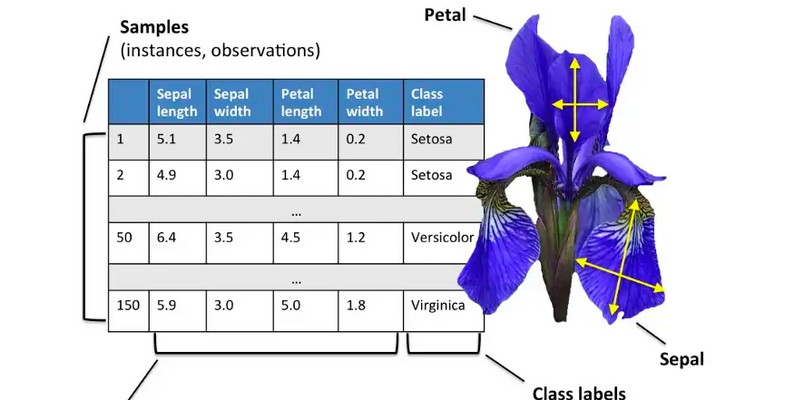

In [ ]:
import sklearn

seed=42
iris = sklearn.datasets.load_iris()
train_x, valid_x, train_y, valid_y = sklearn.model_selection.train_test_split(
    iris.data, iris.target, test_size=0.25, random_state=seed
)



**Manual Parameter Setting**

In [ ]:
import sklearn

alpha = 1e-3
mymodel = sklearn.linear_model.SGDClassifier(alpha=alpha,random_state=seed)


mymodel.fit(train_x, train_y)
print("Best alpha:", alpha)
print("Final Score: ", mymodel.score(valid_x, valid_y))

Best alpha: 0.001
Final Score:  0.6842105263157895


**GridSearchCV**

In [ ]:
import sklearn
import numpy as np

param_grid = { 'alpha' : np.arange(1e-5,1e-4,1e-5)}
print(param_grid)

mymodel = sklearn.linear_model.SGDClassifier(random_state=seed)
mymodel_cv = sklearn.model_selection.GridSearchCV(mymodel, param_grid, cv=5)
mymodel_cv.fit(train_x, train_y)

print("Best Alpha:", mymodel_cv.best_params_['alpha'])
print("GridSearchCV Score:", mymodel_cv.best_score_)


alpha = mymodel_cv.best_params_['alpha']
mymodel = sklearn.linear_model.SGDClassifier(alpha=alpha,random_state=seed)
mymodel.fit(train_x, train_y)
print("Best alpha:", alpha)
print("Final Score: ", mymodel.score(valid_x, valid_y))


{'alpha': array([1.e-05, 2.e-05, 3.e-05, 4.e-05, 5.e-05, 6.e-05, 7.e-05, 8.e-05,
       9.e-05])}
Best Alpha: 9e-05
GridSearchCV Score: 0.8051383399209489
Best alpha: 9e-05
Final Score:  0.7368421052631579


**RandomizedSearchCV**

In [ ]:
import sklearn
import random


param_dist = {
    'alpha' : [random.uniform(1e-5,1e-4) for x in range(10)]
    }
print(param_dist)

mymodel = sklearn.linear_model.SGDClassifier(random_state=seed)
mymodel_cv = sklearn.model_selection.RandomizedSearchCV(mymodel, param_dist, cv=5)
mymodel_cv.fit(train_x, train_y)
print("Best Alpha:", mymodel_cv.best_params_['alpha'])
print("RandomizedSearchCV Score:", mymodel_cv.best_score_)


alpha = mymodel_cv.best_params_['alpha']
mymodel = sklearn.linear_model.SGDClassifier(alpha=alpha,random_state=seed)
mymodel.fit(train_x, train_y)
print("Best alpha:", alpha)
print("Final Score: ", mymodel.score(valid_x, valid_y))


{'alpha': [1.5806614140578708e-05, 7.825511265065131e-05, 2.474331817426267e-05, 2.8564224310593476e-05, 3.4661310400263766e-05, 8.292625535217217e-05, 5.592939937327858e-05, 2.754047134050145e-05, 5.7034295371251895e-05, 2.6336674013064708e-05]}
Best Alpha: 7.825511265065131e-05
RandomizedSearchCV Score: 0.8023715415019763
Best alpha: 7.825511265065131e-05
Final Score:  0.7894736842105263


**Bayesian Optimization (using the Tree Parzen Estimator or TPE)**

*Optuna*

In [ ]:
#Optuna
!pip install optuna

In [ ]:
import sklearn.datasets
import sklearn.linear_model
import sklearn.model_selection

import optuna
seed=42

iris = sklearn.datasets.load_iris()
classes = list(set(iris.target))
train_x, valid_x, train_y, valid_y = sklearn.model_selection.train_test_split(
  iris.data, iris.target, test_size=0.25, random_state=seed
)

def objective(trial):
  alpha = trial.suggest_float("alpha", 1e-5, 1e-4, log=True)
  mymodel = sklearn.linear_model.SGDClassifier(alpha=alpha,random_state=seed)
  mymodel.fit(train_x, train_y)
  return 1- mymodel.score(valid_x, valid_y)

# By default, Optuna uses :class:`~optuna.samplers.TPESampler` (Tree-structured Parzen Estimator).
study = optuna.create_study()
study.optimize(objective, n_trials=10)

best_params = study.best_params
alpha = best_params["alpha"]
mymodel = sklearn.linear_model.SGDClassifier(alpha=alpha,random_state=seed)
mymodel.fit(train_x, train_y)
print("Best alpha:", alpha)
print("Final Score: ", mymodel.score(valid_x, valid_y))

[I 2025-11-06 13:32:17,748] A new study created in memory with name: no-name-d67eb85e-b758-438d-ac6b-6911f11fc9eb
[I 2025-11-06 13:32:17,762] Trial 0 finished with value: 0.1578947368421053 and parameters: {'alpha': 1.3057670050761409e-05}. Best is trial 0 with value: 0.1578947368421053.
[I 2025-11-06 13:32:17,788] Trial 1 finished with value: 0.1578947368421053 and parameters: {'alpha': 1.3048974610654904e-05}. Best is trial 0 with value: 0.1578947368421053.
[I 2025-11-06 13:32:17,804] Trial 2 finished with value: 0.1842105263157895 and parameters: {'alpha': 1.447637021317923e-05}. Best is trial 0 with value: 0.1578947368421053.
[I 2025-11-06 13:32:17,814] Trial 3 finished with value: 0.13157894736842102 and parameters: {'alpha': 7.143515895262971e-05}. Best is trial 3 with value: 0.13157894736842102.
[I 2025-11-06 13:32:17,823] Trial 4 finished with value: 0.10526315789473684 and parameters: {'alpha': 4.378099105643465e-05}. Best is trial 4 with value: 0.10526315789473684.
[I 2025-11

Best alpha: 4.378099105643465e-05
Final Score:  0.8947368421052632


# Pipeline-Level Optimization

**Ensembling**

*AutoGluon*

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install autogluon --extra-index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cpu
  Using cached autogluon-1.4.0-py3-none-any.whl.metadata (11 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter const

In [ ]:

import pandas as pd
from sklearn.datasets import load_iris
from autogluon.tabular import TabularPredictor

seed=42
# Load the Iris dataset
iris = load_iris(as_frame=True)
df = iris.frame
df['target'] = iris.target

# Split into train/test
train_data = df.sample(frac=0.75, random_state=seed)
test_data = df.drop(train_data.index)

# Define label column
label = 'target'

# Train AutoGluon
predictor = TabularPredictor(label=label).fit(train_data)

# # Evaluate on test data
# leaderboard = predictor.leaderboard(test_data, silent=False)
# print("\n=== Leaderboard ===")
# print(leaderboard)

# Make predictions
preds = predictor.evaluate(test_data)
# predict(test_data)
print("Final Score: ", preds['accuracy'])


No path specified. Models will be saved in: "AutogluonModels/ag-20251106_135622"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Thu Oct  2 10:42:05 UTC 2025
CPU Count:          2
Memory Avail:       10.59 GB / 12.67 GB (83.6%)
Disk Space Avail:   66.27 GB / 107.72 GB (61.5%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='extreme' : New in v1.4: Massively better than 'best' on datasets <30000 samples by using new models meta-learned on https://tabarena.ai: TabPFNv2, TabICL, Mitra, and TabM. Absolute best accuracy. Requires a GPU. Recommended 64 GB CPU memory and 32+ GB GPU memory.
	presets='

Final Score:  0.9736842105263158


In [ ]:
!pip install TPOT

/usr/local/lib/python3.12/dist-packages/tpot/tpot_estimator/estimator.py:458: UserWarning: Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.
  warnings.warn("Both generations and max_time_mins are set. TPOT will terminate when the first condition is met.")
/usr/local/lib/python3.12/dist-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 38475 instead
  warnings.warn(
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:35195
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:38475/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:42601'
INFO:distributed.scheduler:Register worker addr: tcp://127.0.0.1:39275 name: 0
INFO:distributed.scheduler:Starting worker compute stream, tcp://127.0.0.1:39275
INFO:dis

Final Score:  1.0
[('ColumnOrdinalEncoder_1', 'VarianceThreshold_1'), ('GaussianNB_1', 'ColumnOrdinalEncoder_1')]


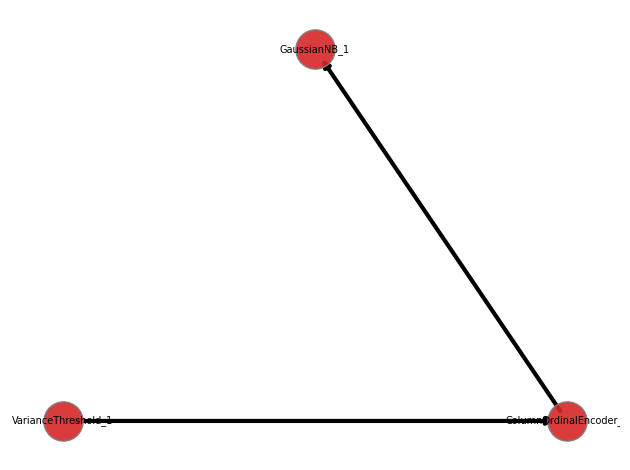

In [ ]:
import sklearn
import sklearn.datasets
import sklearn.metrics
import tpot
from tpot import TPOTClassifier


#search_space="linear-light", "linear", "graph" or "graph-light""
# classification_optimizer = TPOTClassifier(search_space="graph-light", n_jobs=1, cv=5, generations=5, population_size=10, verbose=3)

from tpot.search_spaces.pipelines import SequentialPipeline
from tpot.config import get_search_space

stc_search_space = SequentialPipeline([
    get_search_space("selectors"),
    get_search_space("all_transformers"),
    get_search_space("classifiers"),
])

est = tpot.TPOTEstimator(
    search_space = stc_search_space,
    scorers=["accuracy"],
    scorers_weights=[1.0],
    classification = True,
    cv = 5,
    max_eval_time_mins = 10,
    early_stop = 2,
    verbose = 2,
    n_jobs=1,
    generations=10,
    population_size=5,
    export_graphpipeline=True
)

est.fit(train_x, train_y)



best_pipeline = est.fitted_pipeline_
score= sklearn.metrics.accuracy_score(valid_y, best_pipeline.predict(valid_x))
print("Final Score: ", score)

print(best_pipeline)
best_pipeline.plot()
